In [123]:
from pythreejs import *
import numpy as np
import pandas as pd

from pyntcloud import PyntCloud
from pyntcloud.geometry.models.sphere import create_sphere

from scipy import stats

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams
from mpl_toolkits import mplot3d
import plotly.graph_objects as go
import collections
from mpl_toolkits.mplot3d.axes3d import Axes3D
import os

from scipy.spatial import ConvexHull

from IPython.display import display
from ipywidgets import HTML, Text, Output, VBox

In [124]:
def con_hull_vol(in_dir):
    
    files = pd.Series(np.array(os.listdir(in_dir)))
    
    csvs = pd.Series(files).str.contains('.csv') #'.csv'
    files = files[csvs]
    
    outputs = collections.OrderedDict()
    
    for filename in files:
        
        vol_df = []
        
        df = pd.read_csv(in_dir + str(filename), names=['x','y','z'], skiprows=1)
        
        for i in range(1,37):

            data = df.loc[i]
            
            pc = PyntCloud(data)
            con_hull_id = pc.add_structure('convex_hull')
            con_hull = pc.structures[con_hull_id]
            pc.mesh = con_hull.get_mesh()
            vol = con_hull.volume
            vol_df.append({
                'dekad': i,
                'volume': vol,

            })
        
        outputs[filename] = pd.DataFrame(vol_df)
    
    return outputs

In [125]:
volumes = con_hull_vol('/home/rgreen/DroughtEDM/Data/LCs_skill_split/')

(0.0, 1000.0)

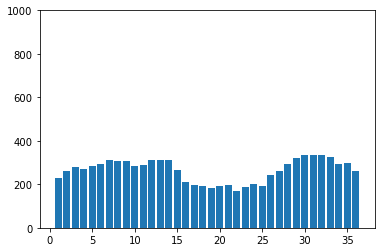

In [44]:
fig = plt.figure()
data = volumes['precip_bo_low_embedded.csv']
im = plt.bar(data.dekad, data.volume)
plt.ylim([0,1000])

(0.0, 1000.0)

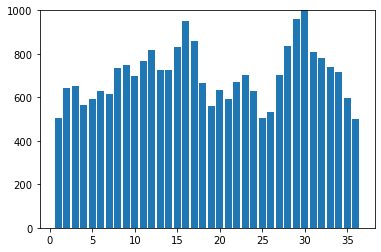

In [45]:
fig = plt.figure()
data = volumes['precip_bo_high_embedded.csv']
im = plt.bar(data.dekad, data.volume)
plt.ylim([0,1000])

(0.0, 200.0)

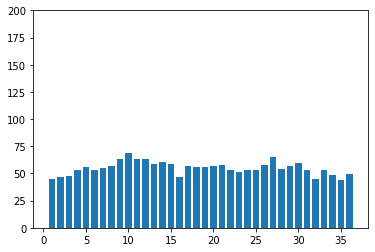

In [52]:
fig = plt.figure()
data = volumes['ndvi_bo_low_embedded.csv']
im = plt.bar(data.dekad, data.volume)
plt.ylim([0,200])

(0.0, 200.0)

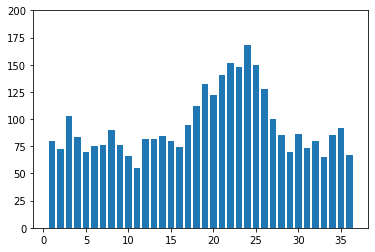

In [53]:
fig = plt.figure()
data = volumes['ndvi_bo_high_embedded.csv']
im = plt.bar(data.dekad, data.volume)
plt.ylim([0,200])

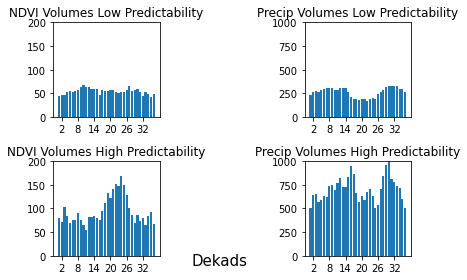

In [102]:
fig, axes = plt.subplots(2, )
axes[0, 0].bar(volumes['ndvi_bo_low_embedded.csv'].dekad, volumes['ndvi_bo_low_embedded.csv'].volume)
axes[0,0].set_ylim([0,200])
axes[0,0].set_xticks(np.arange(2,37, 6))
axes[0,0].set_title('NDVI Volumes Low Predictability')
axes[1, 0].bar(volumes['ndvi_bo_high_embedded.csv'].dekad, volumes['ndvi_bo_high_embedded.csv'].volume)
axes[1,0].set_ylim([0,200])
axes[1,0].set_xticks(np.arange(2,37, 6))
axes[1,0].set_title('NDVI Volumes High Predictability')
axes[0, 1].bar(volumes['precip_bo_low_embedded.csv'].dekad, volumes['precip_bo_low_embedded.csv'].volume)
axes[0,1].set_ylim([0,1000])
axes[0,1].set_xticks(np.arange(2,37, 6))
axes[0,1].set_title('Precip Volumes Low Predictability')
axes[1, 1].bar(volumes['precip_bo_high_embedded.csv'].dekad, volumes['precip_bo_high_embedded.csv'].volume)
axes[1,1].set_ylim([0,1000])
axes[1,1].set_xticks(np.arange(2,37, 6))
axes[1,1].set_title('Precip Volumes High Predictability')
axes[1,0].text(50, -20, 'Dekads', size=15)

plt.tight_layout()

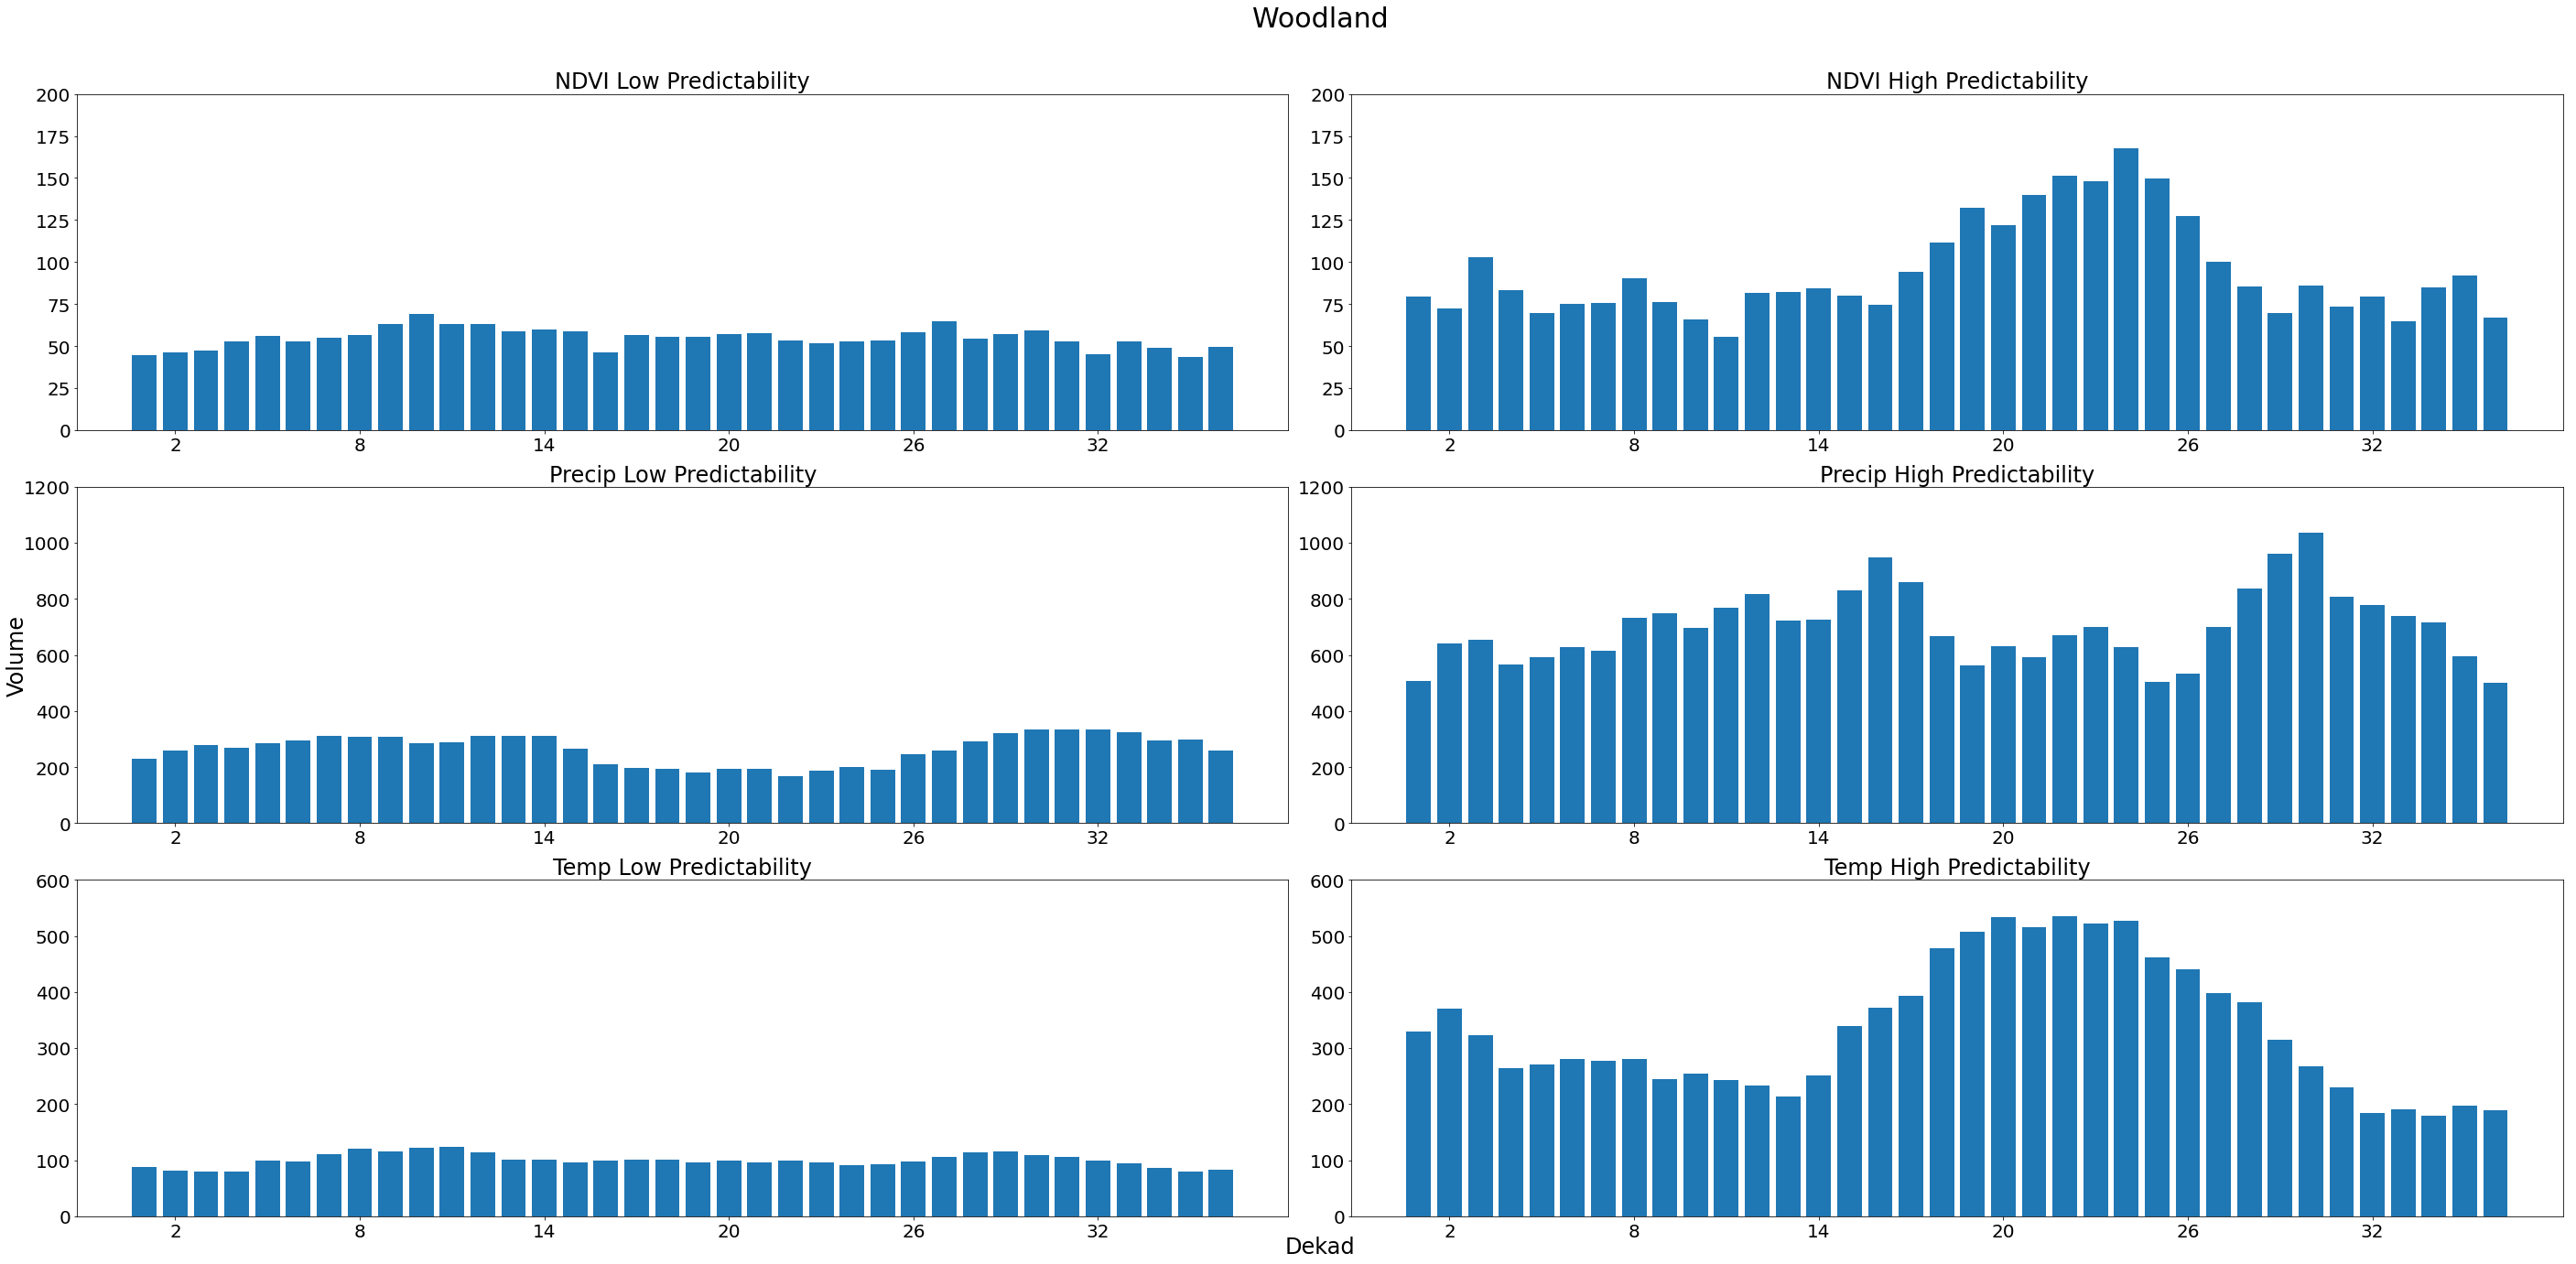

In [169]:
fig = plt.figure(figsize = (40, 20))
ax = fig.add_subplot(111)   
ax1 = fig.add_subplot(321)
ax1.bar(volumes['ndvi_bo_low_embedded.csv'].dekad, volumes['ndvi_bo_low_embedded.csv'].volume)
ax1.set_ylim([0,200])
ax1.set_xticks(np.arange(2,37, 6))
ax1.set_title('NDVI Low Predictability', fontsize = 24)
ax2 = fig.add_subplot(323)
ax2.bar(volumes['precip_bo_low_embedded.csv'].dekad, volumes['precip_bo_low_embedded.csv'].volume)
ax2.set_ylim([0,1200])
ax2.set_xticks(np.arange(2,37, 6))
ax2.set_title('Precip Low Predictability', fontsize = 24)
ax3 = fig.add_subplot(322)
ax3.bar(volumes['ndvi_bo_high_embedded.csv'].dekad, volumes['ndvi_bo_high_embedded.csv'].volume)
ax3.set_ylim([0,200])
ax3.set_xticks(np.arange(2,37, 6))
ax3.set_title('NDVI High Predictability', fontsize = 24)
ax4 = fig.add_subplot(324)
ax4.bar(volumes['precip_bo_high_embedded.csv'].dekad, volumes['precip_bo_high_embedded.csv'].volume)
ax4.set_ylim([0,1200])
ax4.set_xticks(np.arange(2,37, 6))
ax4.set_title('Precip High Predictability', fontsize = 24)
ax5 = fig.add_subplot(325)
ax5.bar(volumes['temp_bo_low_embedded.csv'].dekad, volumes['temp_bo_low_embedded.csv'].volume)
ax5.set_ylim([0,600])
ax5.set_xticks(np.arange(2,37, 6))
ax5.set_title('Temp Low Predictability', fontsize = 24)
ax6 = fig.add_subplot(326)
ax6.bar(volumes['temp_bo_high_embedded.csv'].dekad, volumes['temp_bo_high_embedded.csv'].volume)
ax6.set_ylim([0,600])
ax6.set_xticks(np.arange(2,37, 6))
ax6.set_title('Temp High Predictability', fontsize = 24)

ax.set_xlabel('Dekad', fontsize = 24)
ax.set_ylabel('Volume', fontsize = 24, labelpad = 30)
ax.set_title('Woodland\n \n', fontsize = 30)

ax1.yaxis.set_tick_params(labelsize=20)
ax1.xaxis.set_tick_params(labelsize=20)
ax2.yaxis.set_tick_params(labelsize=20)
ax2.xaxis.set_tick_params(labelsize=20)
ax3.yaxis.set_tick_params(labelsize=20)
ax3.xaxis.set_tick_params(labelsize=20)
ax4.yaxis.set_tick_params(labelsize=20)
ax4.xaxis.set_tick_params(labelsize=20)
ax5.yaxis.set_tick_params(labelsize=20)
ax5.xaxis.set_tick_params(labelsize=20)
ax6.yaxis.set_tick_params(labelsize=20)
ax6.xaxis.set_tick_params(labelsize=20)

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

plt.tight_layout()

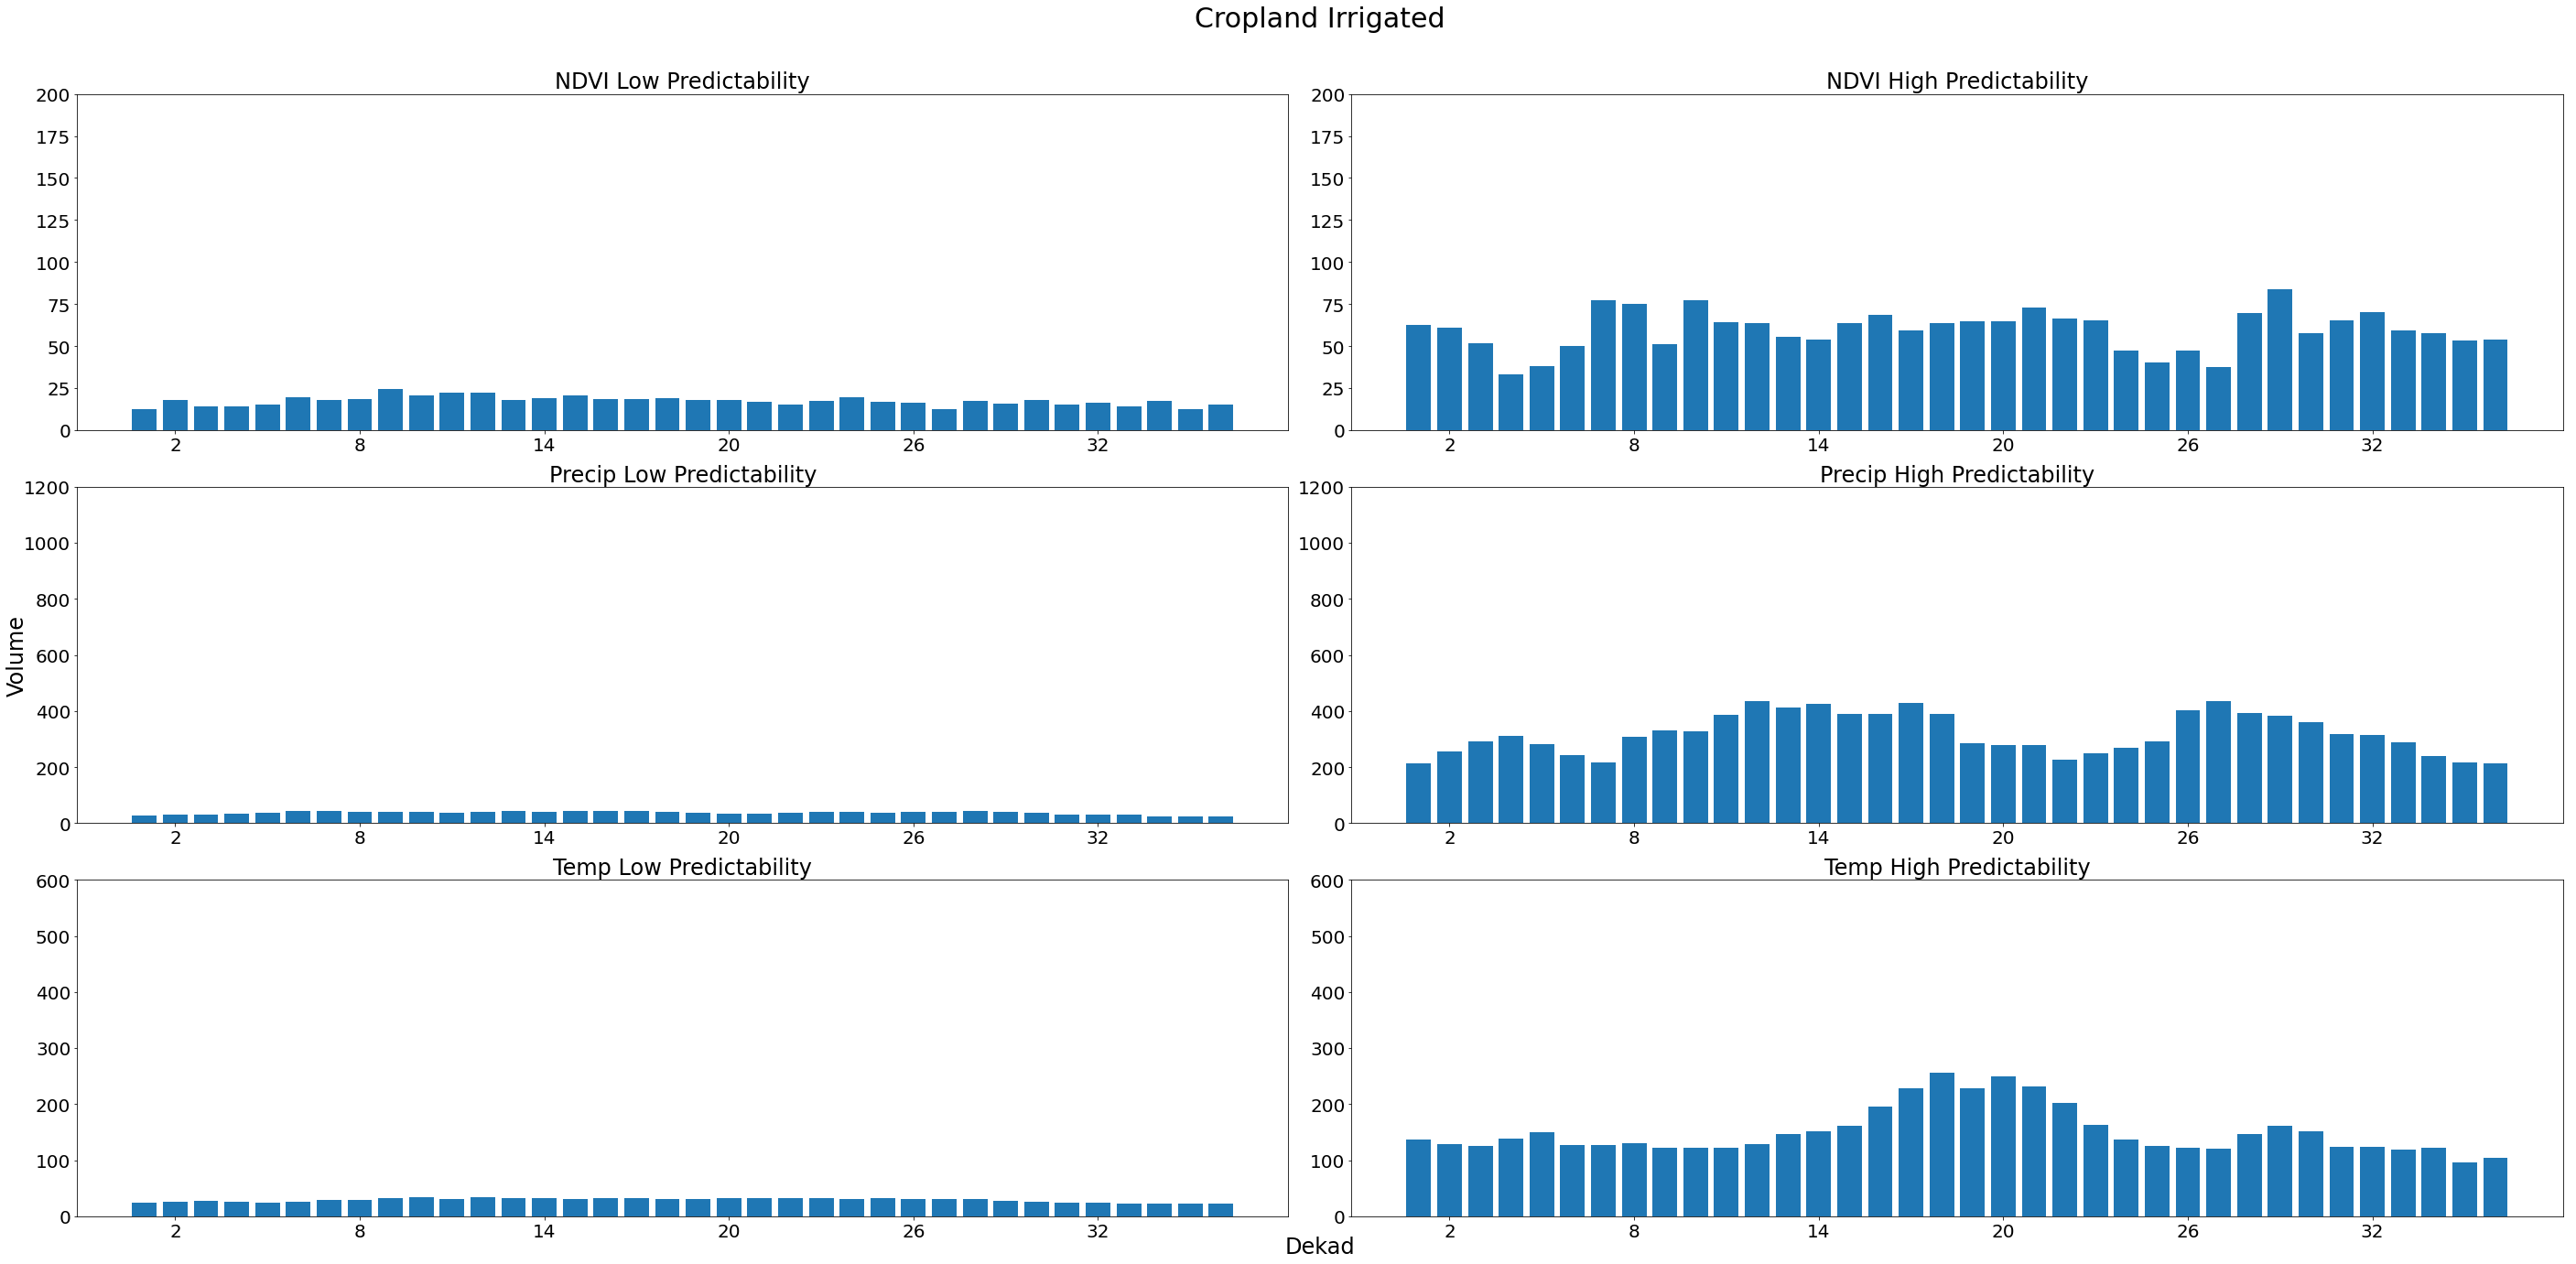

In [168]:
fig = plt.figure(figsize = (40, 20))
ax = fig.add_subplot(111)   
ax1 = fig.add_subplot(321)
ax1.bar(volumes['ndvi_ci_low_embedded.csv'].dekad, volumes['ndvi_ci_low_embedded.csv'].volume)
ax1.set_ylim([0,200])
ax1.set_xticks(np.arange(2,37, 6))
ax1.set_title('NDVI Low Predictability', fontsize = 24)
ax2 = fig.add_subplot(323)
ax2.bar(volumes['precip_ci_low_embedded.csv'].dekad, volumes['precip_ci_low_embedded.csv'].volume)
ax2.set_ylim([0,1200])
ax2.set_xticks(np.arange(2,37, 6))
ax2.set_title('Precip Low Predictability', fontsize = 24)
ax3 = fig.add_subplot(322)
ax3.bar(volumes['ndvi_ci_high_embedded.csv'].dekad, volumes['ndvi_ci_high_embedded.csv'].volume)
ax3.set_ylim([0,200])
ax3.set_xticks(np.arange(2,37, 6))
ax3.set_title('NDVI High Predictability', fontsize = 24)
ax4 = fig.add_subplot(324)
ax4.bar(volumes['precip_ci_high_embedded.csv'].dekad, volumes['precip_ci_high_embedded.csv'].volume)
ax4.set_ylim([0,1200])
ax4.set_xticks(np.arange(2,37, 6))
ax4.set_title('Precip High Predictability', fontsize = 24)
ax5 = fig.add_subplot(325)
ax5.bar(volumes['temp_ci_low_embedded.csv'].dekad, volumes['temp_ci_low_embedded.csv'].volume)
ax5.set_ylim([0,600])
ax5.set_xticks(np.arange(2,37, 6))
ax5.set_title('Temp Low Predictability', fontsize = 24)
ax6 = fig.add_subplot(326)
ax6.bar(volumes['temp_ci_high_embedded.csv'].dekad, volumes['temp_ci_high_embedded.csv'].volume)
ax6.set_ylim([0,600])
ax6.set_xticks(np.arange(2,37, 6))
ax6.set_title('Temp High Predictability', fontsize = 24)

ax.set_xlabel('Dekad', fontsize = 24)
ax.set_ylabel('Volume', fontsize = 24, labelpad = 30)
ax.set_title('Cropland Irrigated\n \n', fontsize = 30)

ax1.yaxis.set_tick_params(labelsize=20)
ax1.xaxis.set_tick_params(labelsize=20)
ax2.yaxis.set_tick_params(labelsize=20)
ax2.xaxis.set_tick_params(labelsize=20)
ax3.yaxis.set_tick_params(labelsize=20)
ax3.xaxis.set_tick_params(labelsize=20)
ax4.yaxis.set_tick_params(labelsize=20)
ax4.xaxis.set_tick_params(labelsize=20)
ax5.yaxis.set_tick_params(labelsize=20)
ax5.xaxis.set_tick_params(labelsize=20)
ax6.yaxis.set_tick_params(labelsize=20)
ax6.xaxis.set_tick_params(labelsize=20)

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

plt.tight_layout()

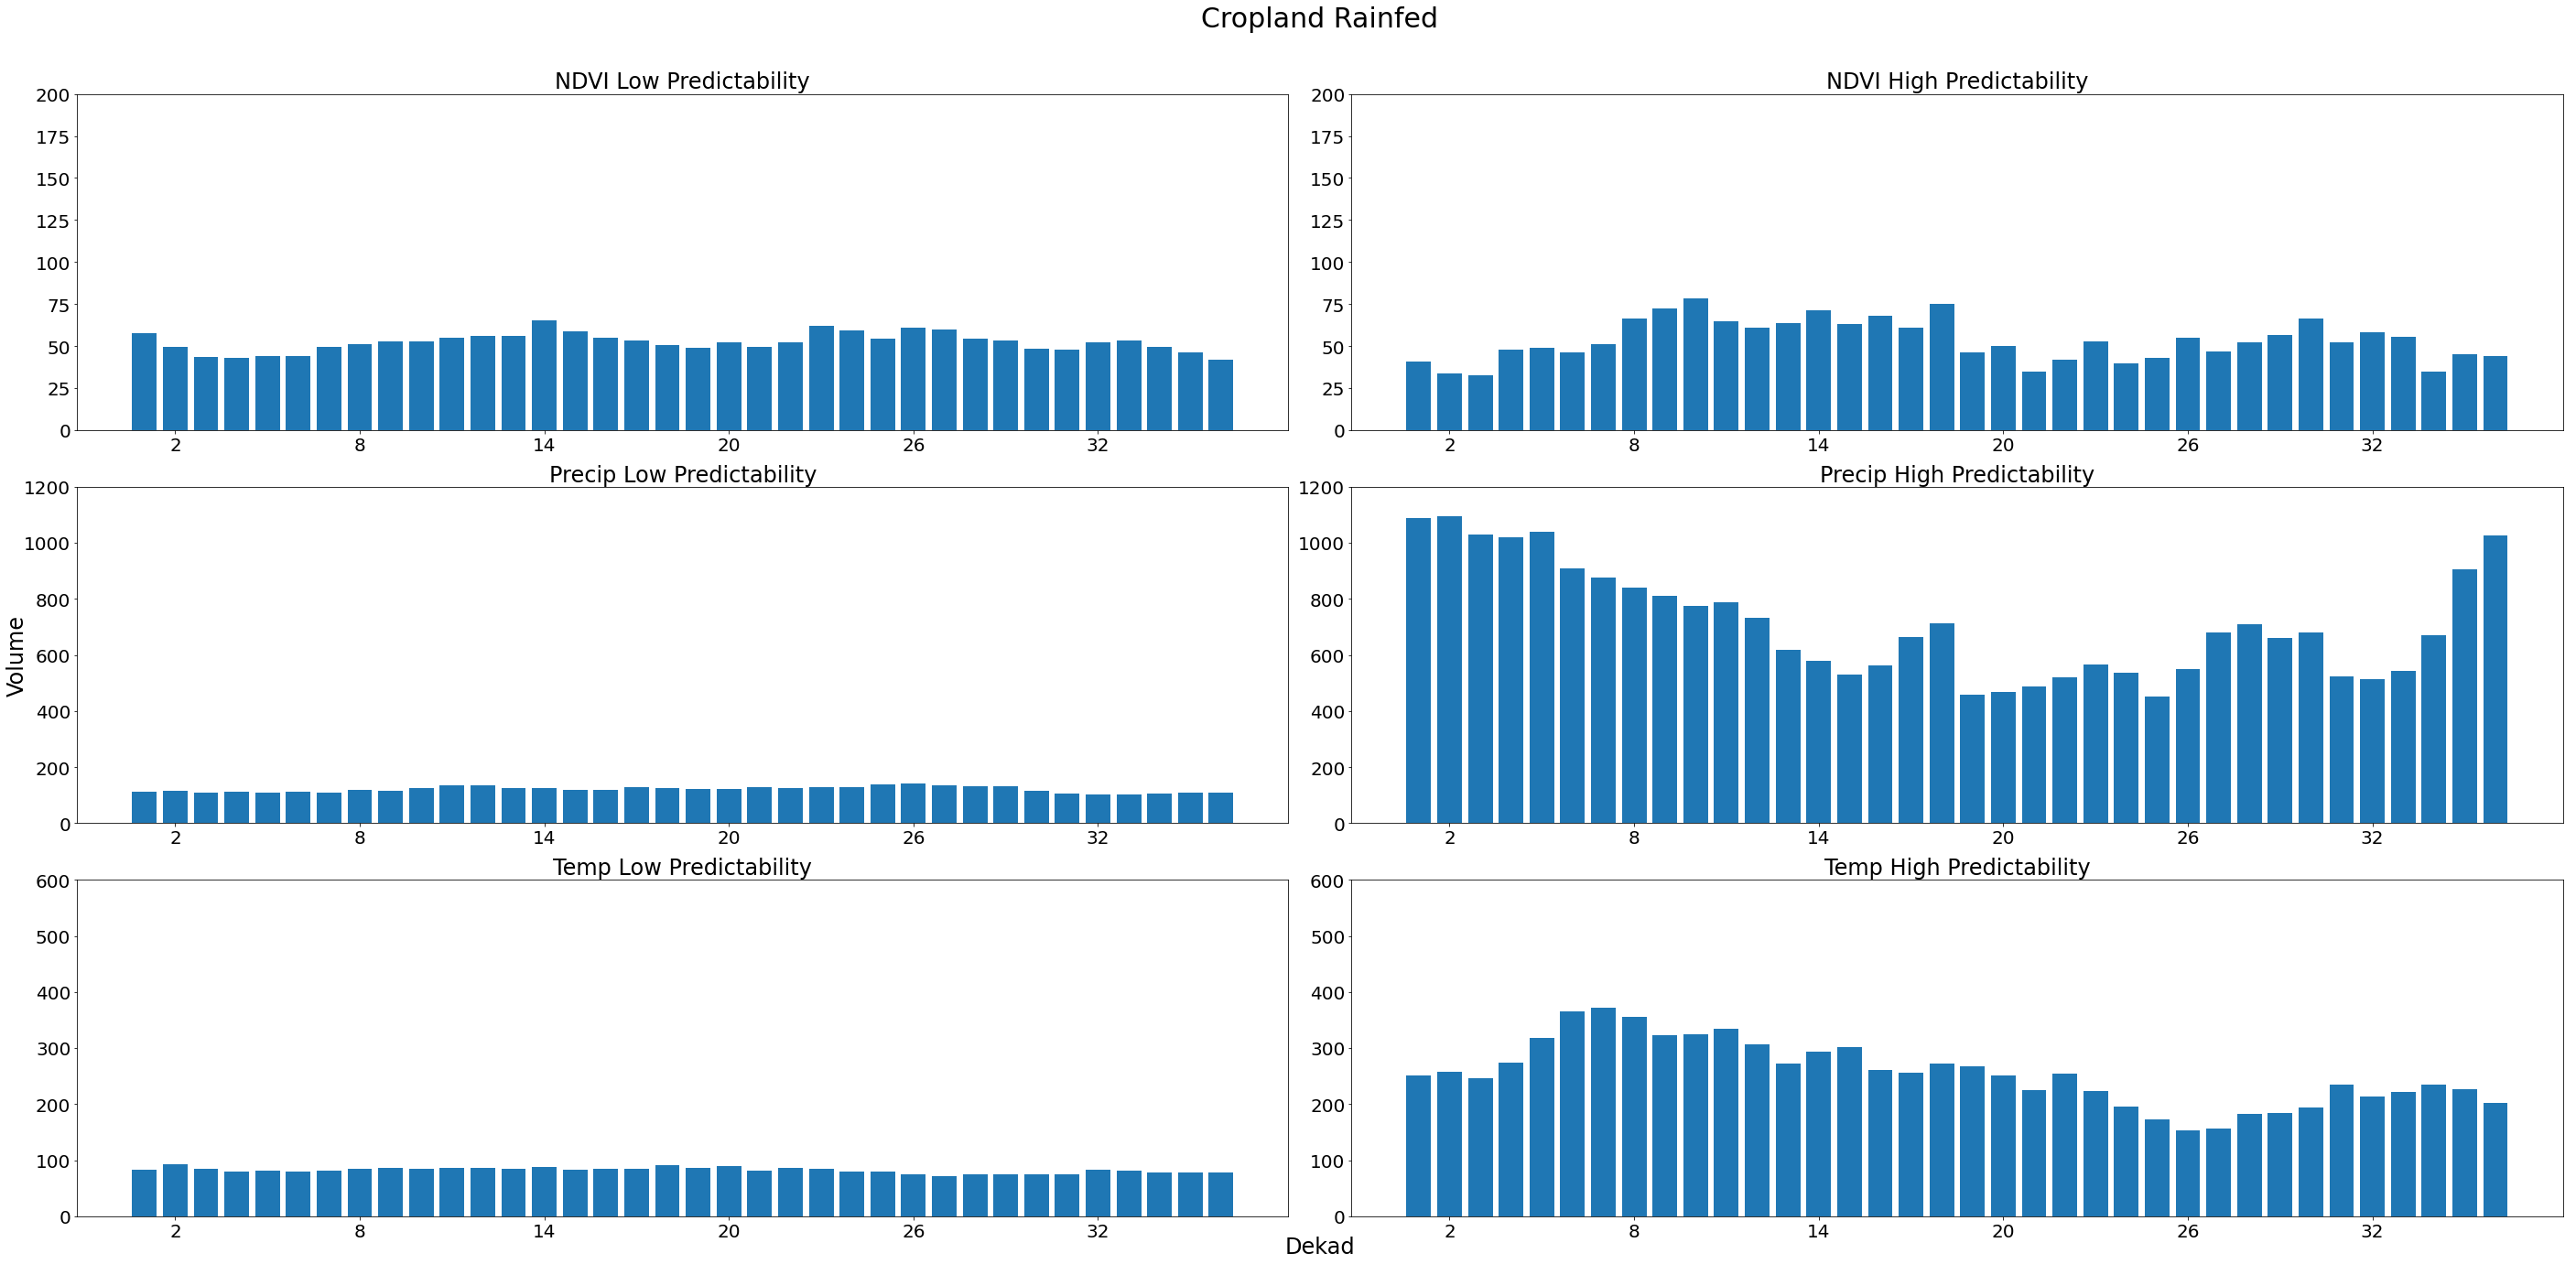

In [170]:
fig = plt.figure(figsize = (40, 20))
ax = fig.add_subplot(111)   
ax1 = fig.add_subplot(321)
ax1.bar(volumes['ndvi_cr_low_embedded.csv'].dekad, volumes['ndvi_cr_low_embedded.csv'].volume)
ax1.set_ylim([0,200])
ax1.set_xticks(np.arange(2,37, 6))
ax1.set_title('NDVI Low Predictability', fontsize = 24)
ax2 = fig.add_subplot(323)
ax2.bar(volumes['precip_cr_low_embedded.csv'].dekad, volumes['precip_cr_low_embedded.csv'].volume)
ax2.set_ylim([0,1200])
ax2.set_xticks(np.arange(2,37, 6))
ax2.set_title('Precip Low Predictability', fontsize = 24)
ax3 = fig.add_subplot(322)
ax3.bar(volumes['ndvi_cr_high_embedded.csv'].dekad, volumes['ndvi_cr_high_embedded.csv'].volume)
ax3.set_ylim([0,200])
ax3.set_xticks(np.arange(2,37, 6))
ax3.set_title('NDVI High Predictability', fontsize = 24)
ax4 = fig.add_subplot(324)
ax4.bar(volumes['precip_cr_high_embedded.csv'].dekad, volumes['precip_cr_high_embedded.csv'].volume)
ax4.set_ylim([0,1200])
ax4.set_xticks(np.arange(2,37, 6))
ax4.set_title('Precip High Predictability', fontsize = 24)
ax5 = fig.add_subplot(325)
ax5.bar(volumes['temp_cr_low_embedded.csv'].dekad, volumes['temp_cr_low_embedded.csv'].volume)
ax5.set_ylim([0,600])
ax5.set_xticks(np.arange(2,37, 6))
ax5.set_title('Temp Low Predictability', fontsize = 24)
ax6 = fig.add_subplot(326)
ax6.bar(volumes['temp_ci_high_embedded.csv'].dekad, volumes['temp_cr_high_embedded.csv'].volume)
ax6.set_ylim([0,600])
ax6.set_xticks(np.arange(2,37, 6))
ax6.set_title('Temp High Predictability', fontsize = 24)

ax.set_xlabel('Dekad', fontsize = 24)
ax.set_ylabel('Volume', fontsize = 24, labelpad = 30)
ax.set_title('Cropland Rainfed\n \n', fontsize = 30)

ax1.yaxis.set_tick_params(labelsize=20)
ax1.xaxis.set_tick_params(labelsize=20)
ax2.yaxis.set_tick_params(labelsize=20)
ax2.xaxis.set_tick_params(labelsize=20)
ax3.yaxis.set_tick_params(labelsize=20)
ax3.xaxis.set_tick_params(labelsize=20)
ax4.yaxis.set_tick_params(labelsize=20)
ax4.xaxis.set_tick_params(labelsize=20)
ax5.yaxis.set_tick_params(labelsize=20)
ax5.xaxis.set_tick_params(labelsize=20)
ax6.yaxis.set_tick_params(labelsize=20)
ax6.xaxis.set_tick_params(labelsize=20)

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

plt.tight_layout()

In [171]:
precip_bo_high_embedded = pd.read_csv('/home/rgreen/DroughtEDM/Data/LCs_skill_split/precip_bo_high_embedded.csv')

In [172]:
precip_bo_high_embedded

,dekad,Data(t-0),Data(t-1),Data(t-2)
0,1,-5.858217,-4.636199,-4.917073
1,2,-4.696158,-5.858217,-4.636199
2,3,-2.182832,-4.696158,-5.858217
3,4,-4.682512,-2.182832,-4.696158
4,5,-4.261726,-4.682512,-2.182832
...,...,...,...,...
12970291,6,0.622964,0.601762,0.772328
12970292,7,1.339058,0.622964,0.601762
12970293,8,-0.685904,1.339058,0.622964
12970294,9,-0.749862,-0.685904,1.339058


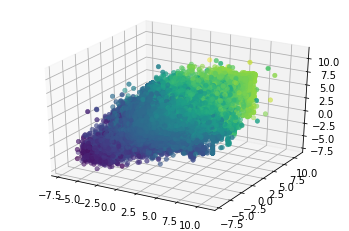

In [173]:
ax = plt.axes(projection='3d')
ax.scatter(precip_bo_high_embedded['Data(t-0)'], precip_bo_high_embedded['Data(t-1)'], precip_bo_high_embedded['Data(t-2)'], c=precip_bo_high_embedded['Data(t-1)'], cmap='viridis', linewidth=0.5);